# Import and Settings
### Python - 3.9.10

In [21]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
from creds import cid, secret
import matplotlib.pyplot as mpl
from spotipy.oauth2 import SpotifyClientCredentials

In [22]:
#  Your Spotify API app credentials
# cid = 'your_client id'
# secret = 'your_client secret'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [23]:
# Tops Songs 2020
# playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"

# Tops Songs 2021
playlist_link = "https://open.spotify.com/playlist/2m7FyVPAKKwu3xfpn49miL?si=c4db6bb449f74d55"

# Tops Songs 2022
# playlist_link = "https://open.spotify.com/playlist/0rXAPXNnHgU3FUmBhKULXP?si=918768d5124a4a4c"

playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [24]:
playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df = pd.DataFrame(columns = playlist_features_list)
    
playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df = pd.concat([df, track_df], ignore_index = True)
    
    
    results = pd.concat([df, track_df], ignore_index = True)

results

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,1c5CllrZr45UBhWpIqM332,Funny Thing,Thundercat,It Is What It Is,140.023,116630,0.586,0.893,7,-8.772,1,0.439,0.642,0.212,0.65,3
1,31qCy5ZaophVA81wtlwLc4,Anyone,Justin Bieber,Anyone,115.884,190779,0.686,0.538,2,-8.026,1,0.0345,0.000003,0.113,0.584,4
2,1GkHyypTFkUf0QQKwYoXH4,You (with Marshmello & Vance Joy),benny blanco,You (with Marshmello & Vance Joy),103.116,169632,0.668,0.563,11,-6.433,1,0.0522,0,0.119,0.305,4
3,4d7ifHr1zrli3fOi9aIHax,Misnomer,The Brook & The Bluff,Yard Sale (Side A),116.361,223240,0.471,0.492,10,-9.043,1,0.0468,0.000668,0.137,0.38,4
4,5th1bFGGaXLM7wDBJpcF06,Booster Seat,Spacey Jane,Sunlight,111.961,268880,0.629,0.551,11,-5.402,1,0.0263,0.000001,0.108,0.699,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1AsQFm7ORbr4NEZ0dUltOY,Way It Goes,Hippo Campus,Landmark,120.007,245456,0.542,0.905,9,-4.215,1,0.0493,0.000428,0.377,0.502,4
97,3i10mtYVZPyoxorz6C19xE,Things I Thought Were Mine,Alfie Templeman,Happiness in Liquid Form,99.992,193165,0.888,0.54,1,-6.071,0,0.134,0.309,0.0821,0.806,4
98,5EYi2rH4LYs6M21ZLOyQTx,Loving Is Easy (feat. Benny Sings),Rex Orange County,Loving Is Easy (feat. Benny Sings),117.024,155720,0.756,0.609,3,-7.927,1,0.0544,0.00482,0.0959,0.537,4
99,3w1P8nwsVi9vxrGvxYLzAC,Hope Is A Heartache,LÉON,LÉON,171.4,201401,0.468,0.495,5,-6.634,1,0.0822,0,0.305,0.235,4


In [25]:
lil_graph_list = results[[
    "danceability",
    "energy",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    ]]

big_graph_list = results[[
    "tempo",
    # "duration_ms",
    "key",
    "loudness",
    "mode",
    "time_signature"
    ]]

graph_list = results[[
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence"
    # "time_signature"
        ]]


graph_list

,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence
0,140.023,116630,0.586,0.893,7,-8.772,1,0.439,0.642,0.212,0.65
1,115.884,190779,0.686,0.538,2,-8.026,1,0.0345,0.000003,0.113,0.584
2,103.116,169632,0.668,0.563,11,-6.433,1,0.0522,0,0.119,0.305
3,116.361,223240,0.471,0.492,10,-9.043,1,0.0468,0.000668,0.137,0.38
4,111.961,268880,0.629,0.551,11,-5.402,1,0.0263,0.000001,0.108,0.699
...,...,...,...,...,...,...,...,...,...,...,...
96,120.007,245456,0.542,0.905,9,-4.215,1,0.0493,0.000428,0.377,0.502
97,99.992,193165,0.888,0.54,1,-6.071,0,0.134,0.309,0.0821,0.806
98,117.024,155720,0.756,0.609,3,-7.927,1,0.0544,0.00482,0.0959,0.537
99,171.4,201401,0.468,0.495,5,-6.634,1,0.0822,0,0.305,0.235


In [26]:
from sklearn.preprocessing import MinMaxScaler
# 
min_max_scaler = MinMaxScaler()

graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])


/var/folders/qp/fkn65nnd78779tktvbsskxr00000gn/T/ipykernel_5750/1512029370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_list.loc[:]=min_max_scaler.fit_transform(graph_list.loc[:])


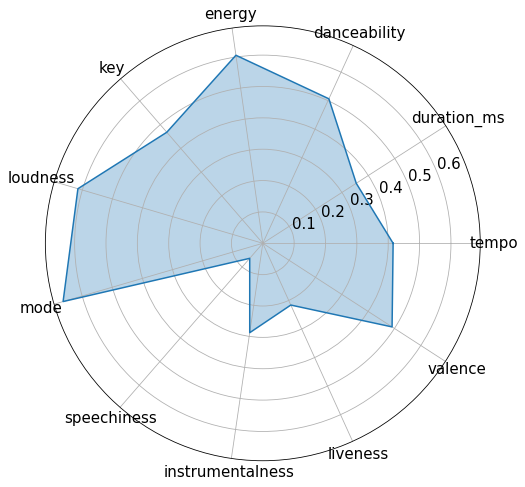

In [27]:
# plot size
fig=mpl.figure(figsize=(12,8))

# convert column names into a list
categories=list(graph_list.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(graph_list.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*3.14 for n in range(N)]
angles+=angles[:1]

# plot
mpl.polar(angles, value)
mpl.fill(angles,value,alpha=0.3)

# mpl.title('Discovery Weekly Songs Audio Features', size=35)

mpl.xticks(angles[:-1],categories, size=15)
mpl.yticks(color='black',size=15)
# mpl.style.use('dark_background') # Because dark mode everything
mpl.show()